<h1 align=center><font size = 5>ResNet+FPN</h1 >

<h3>Objective for this Notebook</h3>
<h5> 1. 觀看架構圖，試著撰寫出模型</h5>
<hr>

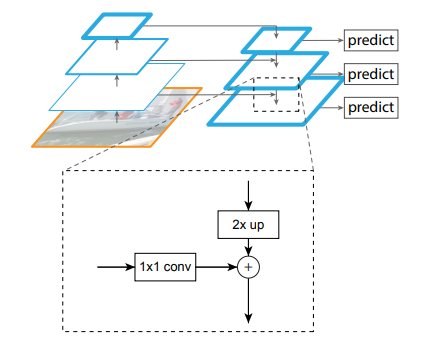

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models


In [2]:
class ResNetBackbone(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        resnet = models.resnet50(pretrained=pretrained)
        self.stem = nn.Sequential(
            resnet.conv1,
            resnet.bn1,
            resnet.relu,
            resnet.maxpool
        )
        self.layer1 = resnet.layer1  # C2
        self.layer2 = resnet.layer2  # C3
        self.layer3 = resnet.layer3  # C4
        self.layer4 = resnet.layer4  # C5

    def forward(self, x):
        x = self.stem(x)
        c2 = self.layer1(x)
        c3 = self.layer2(c2)
        c4 = self.layer3(c3)
        c5 = self.layer4(c4)
        return c2, c3, c4, c5


In [3]:
class FPN(nn.Module):
    def __init__(self, in_channels_list, out_channels):
        super().__init__()
        # 橫向 1x1 conv




        # 輸出 3x3 conv




    def forward(self, features):
        # features = [C2, C3, C4, C5]
        features = features[::-1]  # 變成 [C5, C4, C3, C2]

        #P5


        #P4-P2
        for i in range(1, len(features)):





        return


# 雙擊展開正確答案

<!--
class FPN(nn.Module):
    def __init__(self, in_channels_list, out_channels):
        super().__init__()
        # 橫向 1x1 conv
        self.lateral_convs = nn.ModuleList([
            nn.Conv2d(in_channels, out_channels, kernel_size=1)
            for in_channels in in_channels_list
        ])
        # 輸出 3x3 conv
        self.output_convs = nn.ModuleList([
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
            for _ in in_channels_list
        ])

    def forward(self, features):
        # features = [C2, C3, C4, C5]
        features = features[::-1]  # 變成 [C5, C4, C3, C2]
        x = self.lateral_convs[0](features[0])
        results = [self.output_convs[0](x)]
        for i in range(1, len(features)):
            lateral = self.lateral_convs[i](features[i])
            x = nn.functional.interpolate(x, size=lateral.shape[-2:], mode='nearest')
            x = x + lateral
            results.append(self.output_convs[i](x))
        results = results[::-1]  # 恢復 [P2, P3, P4, P5]
        return results




-->

In [4]:
class ResNetWithFPN(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = ResNetBackbone()
        self.fpn = FPN(in_channels_list=[256, 512, 1024, 2048], out_channels=256)

    def forward(self, x):
        c2, c3, c4, c5 = self.backbone(x)
        features = self.fpn([c2, c3, c4, c5])
        return features  # list of feature maps: [P2, P3, P4, P5]
